## 1119007 Timothy

# Data Cleaning

## Import Data

In [220]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import seaborn as sns
sns.set()

## Load Data

In [221]:
raw_data = pd.read_csv('insurance.csv')
raw_data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.90,0,yes,southwest,16884.92
1,18,male,33.77,1,no,southeast,1725.55
2,28,male,33.00,3,no,southeast,4449.46
3,33,male,22.70,0,no,northwest,21984.47
4,32,male,28.88,0,no,northwest,3866.86


## Data Preprocessing
## Exploring the descriptive statistics

In [222]:
raw_data.describe(include='all')

,age,sex,bmi,children,smoker,region,charges
count,1338.00,1338,1338.00,1338.00,1338,1338,1338.00
unique,nan,2,nan,nan,2,4,nan
top,nan,male,nan,nan,no,southeast,nan
freq,nan,676,nan,nan,1064,364,nan
mean,39.21,NaN,30.66,1.09,NaN,NaN,13270.42
std,14.05,NaN,6.10,1.21,NaN,NaN,12110.01
min,18.00,NaN,15.96,0.00,NaN,NaN,1121.87
25%,27.00,NaN,26.30,0.00,NaN,NaN,4740.29
50%,39.00,NaN,30.40,1.00,NaN,NaN,9382.03
75%,51.00,NaN,34.69,2.00,NaN,NaN,16639.91


# Determine unnecessary variable

In [223]:
#No unnecessary variable

In [224]:
#No missing value

In [225]:
data = raw_data

/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='age', ylabel='Density'>

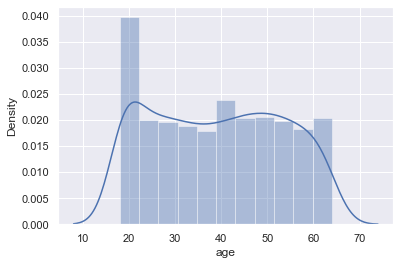

In [226]:
sns.distplot(data['age'])

/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='bmi', ylabel='Density'>

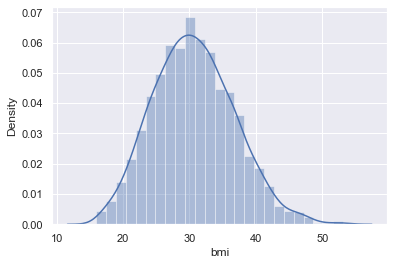

In [227]:
sns.distplot(data['bmi'])

/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='children', ylabel='Density'>

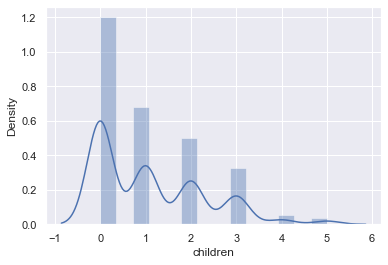

In [228]:
sns.distplot(data['children'])

/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='charges', ylabel='Density'>

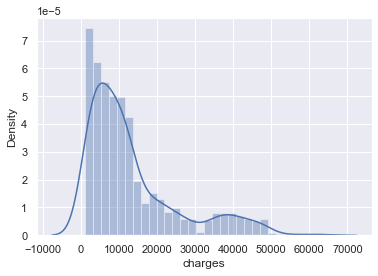

In [229]:
sns.distplot(data['charges'])

In [230]:
q = data['children'].quantile(0.99)
q

5.0

/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='children', ylabel='Density'>

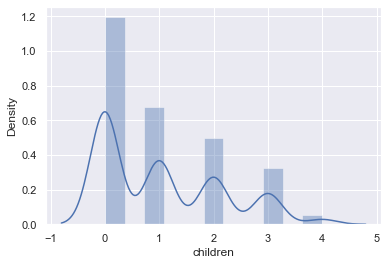

In [231]:
data_1 = data[data['children']<q]
sns.distplot(data_1['children'])

In [232]:
q = data['charges'].quantile(0.99)
q

48537.480725999994

/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='charges', ylabel='Density'>

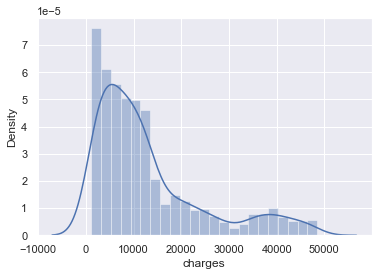

In [233]:
data_2 = data_1[data_1['charges']<q]
sns.distplot(data_2['charges'])

In [234]:
data_cleaned = data_2.reset_index(drop=True)
data_cleaned.describe(include='all')

,age,sex,bmi,children,smoker,region,charges
count,1306.00,1306,1306.00,1306.00,1306,1306,1306.00
unique,nan,2,nan,nan,2,4,nan
top,nan,male,nan,nan,no,southeast,nan
freq,nan,657,nan,nan,1047,351,nan
mean,39.14,NaN,30.60,1.04,NaN,NaN,12903.25
std,14.07,NaN,6.05,1.12,NaN,NaN,11495.63
min,18.00,NaN,15.96,0.00,NaN,NaN,1121.87
25%,26.00,NaN,26.30,0.00,NaN,NaN,4668.37
50%,39.00,NaN,30.30,1.00,NaN,NaN,9296.02
75%,51.00,NaN,34.50,2.00,NaN,NaN,16209.33


 # Examining Assumptions


## Check Linearity with Scatterplot

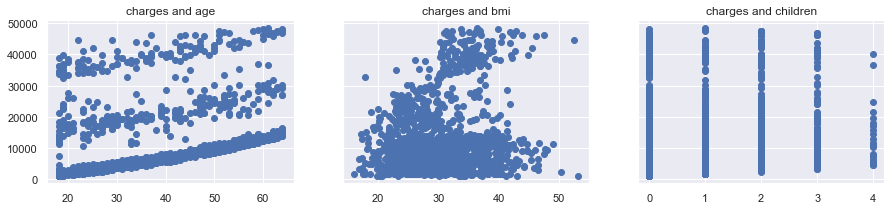

In [235]:
f, (ax1, ax2, ax3) = plt.subplots(1, 3, sharey=True, figsize=(15,3))
ax1.scatter(data_cleaned['age'], data_cleaned['charges'])
ax1.set_title('charges and age')
ax2.scatter(data_cleaned['bmi'], data_cleaned['charges'])
ax2.set_title('charges and bmi')
ax3.scatter(data_cleaned['children'], data_cleaned['charges'])
ax3.set_title('charges and children')

plt.show()

## Relaxing the assumptions

In [236]:
# Log Transformation
log_charges = np.log(data_cleaned['charges'])
data_cleaned['log_charges'] = log_charges
data_cleaned.head()

,age,sex,bmi,children,smoker,region,charges,log_charges
0,19,female,27.90,0,yes,southwest,16884.92,9.73
1,18,male,33.77,1,no,southeast,1725.55,7.45
2,28,male,33.00,3,no,southeast,4449.46,8.40
3,33,male,22.70,0,no,northwest,21984.47,10.00
4,32,male,28.88,0,no,northwest,3866.86,8.26


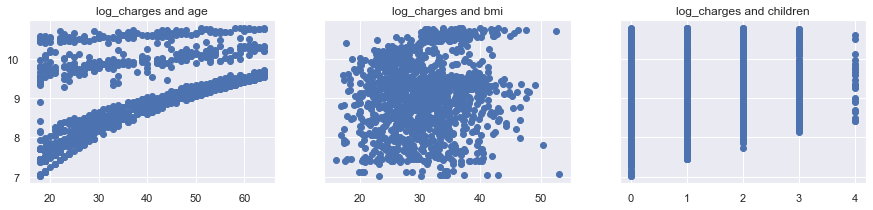

In [237]:
f, (ax1, ax2, ax3) = plt.subplots(1, 3, sharey=True, figsize=(15,3))
ax1.scatter(data_cleaned['age'], data_cleaned['log_charges'])
ax1.set_title('log_charges and age')
ax2.scatter(data_cleaned['bmi'], data_cleaned['log_charges'])
ax2.set_title('log_charges and bmi')
ax3.scatter(data_cleaned['children'], data_cleaned['log_charges'])
ax3.set_title('log_charges and children')

plt.show()

In [238]:
data_cleaned=data_cleaned.drop(['charges'], axis=1)
data_cleaned.head()

,age,sex,bmi,children,smoker,region,log_charges
0,19,female,27.90,0,yes,southwest,9.73
1,18,male,33.77,1,no,southeast,7.45
2,28,male,33.00,3,no,southeast,8.40
3,33,male,22.70,0,no,northwest,10.00
4,32,male,28.88,0,no,northwest,8.26


## Multicolinearity

In [239]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
variables = data_cleaned[['age', 'bmi', 'children']]
vif = pd.DataFrame()

vif['VIF'] = [variance_inflation_factor(variables.values, i) for i in range(variables.shape[1])]
vif['Features'] = variables.columns

In [240]:
vif

,VIF,Features
0,7.47,age
1,7.76,bmi
2,1.84,children


In [241]:
# sudah dekat ke 6, jadi tak dihapus

## Dummies Data

In [242]:
data_with_dummies = pd.get_dummies(data_cleaned, drop_first=True)
data_with_dummies

,age,bmi,children,log_charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27.90,0,9.73,0,1,0,0,1
1,18,33.77,1,7.45,1,0,0,1,0
2,28,33.00,3,8.40,1,0,0,1,0
3,33,22.70,0,10.00,1,0,1,0,0
4,32,28.88,0,8.26,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...
1301,50,30.97,3,9.27,1,0,1,0,0
1302,18,31.92,0,7.70,0,0,0,0,0
1303,18,36.85,0,7.40,0,0,0,1,0
1304,21,25.80,0,7.60,0,0,0,0,1


## Rearrange the Column

In [243]:
data_with_dummies.columns.values

array(['age', 'bmi', 'children', 'log_charges', 'sex_male', 'smoker_yes',
       'region_northwest', 'region_southeast', 'region_southwest'],
      dtype=object)

In [244]:
cols = ['log_charges', 'age', 'bmi', 'children', 'sex_male', 'smoker_yes',
       'region_northwest', 'region_southeast', 'region_southwest']

In [245]:
data_preprocessed = data_with_dummies[cols]
data_preprocessed.head()

,log_charges,age,bmi,children,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,9.73,19,27.90,0,0,1,0,0,1
1,7.45,18,33.77,1,1,0,0,1,0
2,8.40,28,33.00,3,1,0,0,1,0
3,10.00,33,22.70,0,1,0,1,0,0
4,8.26,32,28.88,0,1,0,1,0,0


# Linear Regression Model

## Inputs and Outputs

In [246]:
targets = data_preprocessed['log_charges']
inputs = data_preprocessed.drop(['log_charges'], axis=1)

## Scale the Data

In [247]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(inputs)

StandardScaler()

In [248]:
inputs_scaled = scaler.transform(inputs)

In [249]:
inputs_scaled

array([[-1.43192725, -0.44598336, -0.92891971, ..., -0.57204525,
        -0.60625017,  1.77742389],
       [-1.5030336 ,  0.52400812, -0.03884697, ..., -0.57204525,
         1.64948408, -0.562612  ],
       [-0.79197011,  0.39676903,  1.7412985 , ..., -0.57204525,
         1.64948408, -0.562612  ],
       ...,
       [-1.5030336 ,  1.03296447, -0.92891971, ..., -0.57204525,
         1.64948408, -0.562612  ],
       [-1.28971456, -0.79299906, -0.92891971, ..., -0.57204525,
        -0.60625017,  1.77742389],
       [ 1.55453943, -0.25264605, -0.92891971, ...,  1.74811345,
        -0.60625017, -0.562612  ]])

## Train Test Split

In [250]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(inputs_scaled, targets, test_size=0.2, random_state=365)

## Create the Regression

In [251]:
reg = LinearRegression()

reg.fit(x_train, y_train)

LinearRegression()

In [252]:
y_hat = reg.predict(x_train)

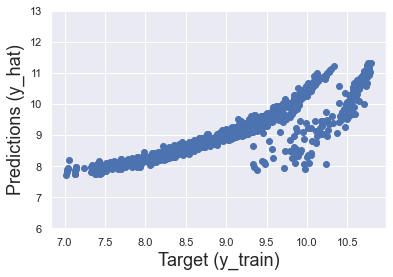

In [253]:
plt.scatter(y_train, y_hat)
plt.xlabel('Target (y_train)', size=18)
plt.ylabel('Predictions (y_hat)', size=18)
plt.ylim(6,13)
plt.show()

/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Residuals PDF')

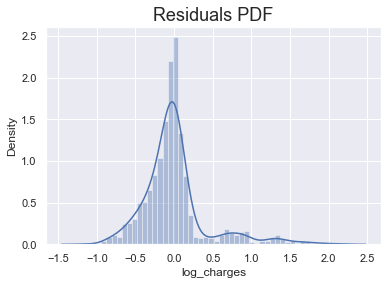

In [254]:
sns.distplot(y_train - y_hat)
plt.title("Residuals PDF", size=18)

In [255]:
reg.score(x_train, y_train)

0.7775340547287671

## Finding Weight and Bias

In [256]:
reg.intercept_

9.07442444882471

In [257]:
reg.coef_

array([ 0.47731433,  0.10107765,  0.11529216, -0.03809816,  0.62761109,
       -0.02893763, -0.07503196, -0.05172474])

In [258]:
reg_summary = pd.DataFrame(inputs.columns.values, columns=['Features'])
reg_summary['Weight'] = reg.coef_
reg_summary

,Features,Weight
0,age,0.48
1,bmi,0.10
2,children,0.12
3,sex_male,-0.04
4,smoker_yes,0.63
5,region_northwest,-0.03
6,region_southeast,-0.08
7,region_southwest,-0.05


## Testing

In [259]:
y_hat_test = reg.predict(x_test)

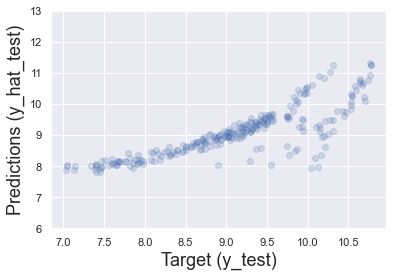

In [260]:
plt.scatter(y_test, y_hat_test, alpha=0.2)
plt.xlabel('Target (y_test)', size=18)
plt.ylabel('Predictions (y_hat_test)', size=18)
plt.ylim(6,13)
plt.show()

In [261]:
df_perform = pd.DataFrame(np.exp(y_hat_test), columns = ['Prediction'])
df_perform.head()

,Prediction
0,4976.57
1,12090.94
2,3589.10
3,3550.40
4,11439.38


In [262]:
df_perform['Target'] = np.exp(y_test.reset_index(drop=True))
df_perform

,Prediction,Target
0,4976.57,4934.71
1,12090.94,11741.73
2,3589.10,3206.49
3,3550.40,2643.27
4,11439.38,11743.93
5,11599.42,10381.48
6,2988.08,1629.83
7,5682.64,4949.76
8,77003.72,30184.94
9,5680.78,6640.54


In [263]:
df_perform['Residual'] = df_perform['Target'] - df_perform['Prediction']
df_perform

,Prediction,Target,Residual
0,4976.57,4934.71,-41.86
1,12090.94,11741.73,-349.22
2,3589.10,3206.49,-382.60
3,3550.40,2643.27,-907.13
4,11439.38,11743.93,304.56
5,11599.42,10381.48,-1217.94
6,2988.08,1629.83,-1358.25
7,5682.64,4949.76,-732.88
8,77003.72,30184.94,-46818.79
9,5680.78,6640.54,959.77


In [264]:
df_perform['Difference%'] = np.absolute(df_perform['Residual']/df_perform['Target']*100)
df_perform.head()

,Prediction,Target,Residual,Difference%
0,4976.57,4934.71,-41.86,0.85
1,12090.94,11741.73,-349.22,2.97
2,3589.10,3206.49,-382.60,11.93
3,3550.40,2643.27,-907.13,34.32
4,11439.38,11743.93,304.56,2.59


In [265]:
pd.options.display.max_rows = 999
pd.set_option('display.float_format', lambda x: '%.2f' % x)
df_perform.sort_values(by=['Difference%'])

,Prediction,Target,Residual,Difference%
201,4387.08,4391.65,4.57,0.10
148,4773.33,4779.60,6.28,0.13
149,12668.27,12644.59,-23.68,0.19
191,14034.74,14001.13,-33.61,0.24
260,8573.87,8551.35,-22.53,0.26
115,12683.80,12648.70,-35.10,0.28
224,9255.29,9288.03,32.74,0.35
192,7108.12,7147.47,39.36,0.55
242,5861.67,5910.94,49.28,0.83
0,4976.57,4934.71,-41.86,0.85


In [266]:
df_perform.describe()

,Prediction,Target,Residual,Difference%
count,262.00,262.00,262.00,262.00
mean,12330.67,13079.16,748.49,31.43
std,13352.43,11375.20,8565.95,31.87
min,2447.50,1137.01,-46818.79,0.10
25%,4723.26,4925.86,-1188.74,7.96
50%,8174.97,9711.30,-325.18,17.57
75%,12981.96,17653.92,1296.21,53.31
max,80692.74,47928.03,22165.08,167.00
